# Problem statment

Suppose we take data set about an electronics and there is a variable is `purchase_intention` which reflects our customers intention to buy this product.
Therefore, we must evaluate this variable's normality before performing any analysis because many statistical tests, including the t test, anova, regression, and others, depend on the normality assumption being met.

# Normality test:
A normality test is a statistical method used to determine if a dataset follows a normal distribution, which is a bell-shaped symmetrical distribution characterized by the mean, median, and mode being equal. It's essential in various fields, from finance to biology, as many statistical techniques rely on the assumption of normality.

There are several ways to test for normality, such as:

**Graphical Methods:** Histograms, Q-Q (Quantile-Quantile) plots, visually assess if the data roughly follows a bell curve.

**Statistical Tests:** These include the Shapiro-Wilk test, Kolmogorov-Smirnov test, and others. These tests calculate a test statistic and compare it to critical values to determine if the data significantly deviates from a normal distribution.

However, it's important to note that no test can definitively prove that a dataset comes from a normal distribution; they can only provide evidence against it. Additionally, while many statistical analyses assume normality for accurate results, some techniques are robust enough to handle deviations from normality, especially with larger sample sizes.

If a dataset fails a normality test, it doesn't necessarily mean that the data is useless or incorrect. It might just imply that certain statistical methods assuming normality might not be the best choice or might need adjustments for that particular dataset.

In [ ]:
import numpy as np
from scipy.stats import shapiro
from scipy.stats import kstest
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from scipy import stats
from scipy.stats import boxcox

In [ ]:
# Creating a dataset of 80 samples with the purchase intention variable ranging from 1 to 10.
np.random.seed(45)
purchase_intention = np.random.uniform(1, 10, size=80)

# Convert the dataset to a Pandas DataFrame.
df = pd.DataFrame({'purchase_intention': purchase_intention})

# Print the first 5 rows of the DataFrame.
print(df.head())

# Print the summary statistics of the purchase intention variable.
print(df.describe())



   purchase_intention
0            9.901104
1            5.945903
2            3.533026
3            1.695606
4            5.000225
       purchase_intention
count           80.000000
mean             5.141043
std              2.642368
min              1.354778
25%              2.820296
50%              4.997546
75%              7.171205
max              9.917008


So, we created a demo dataframe having column `purchase_intention`. As we are focusing only on one variable we are not creating other related variable such as  `customer_age`, `product_color`, `brand` etc.

## Visual methods

Now we will try to visually inspections using graphical methods such as Histograms, Q-Q (Quantile-Quantile) plots.


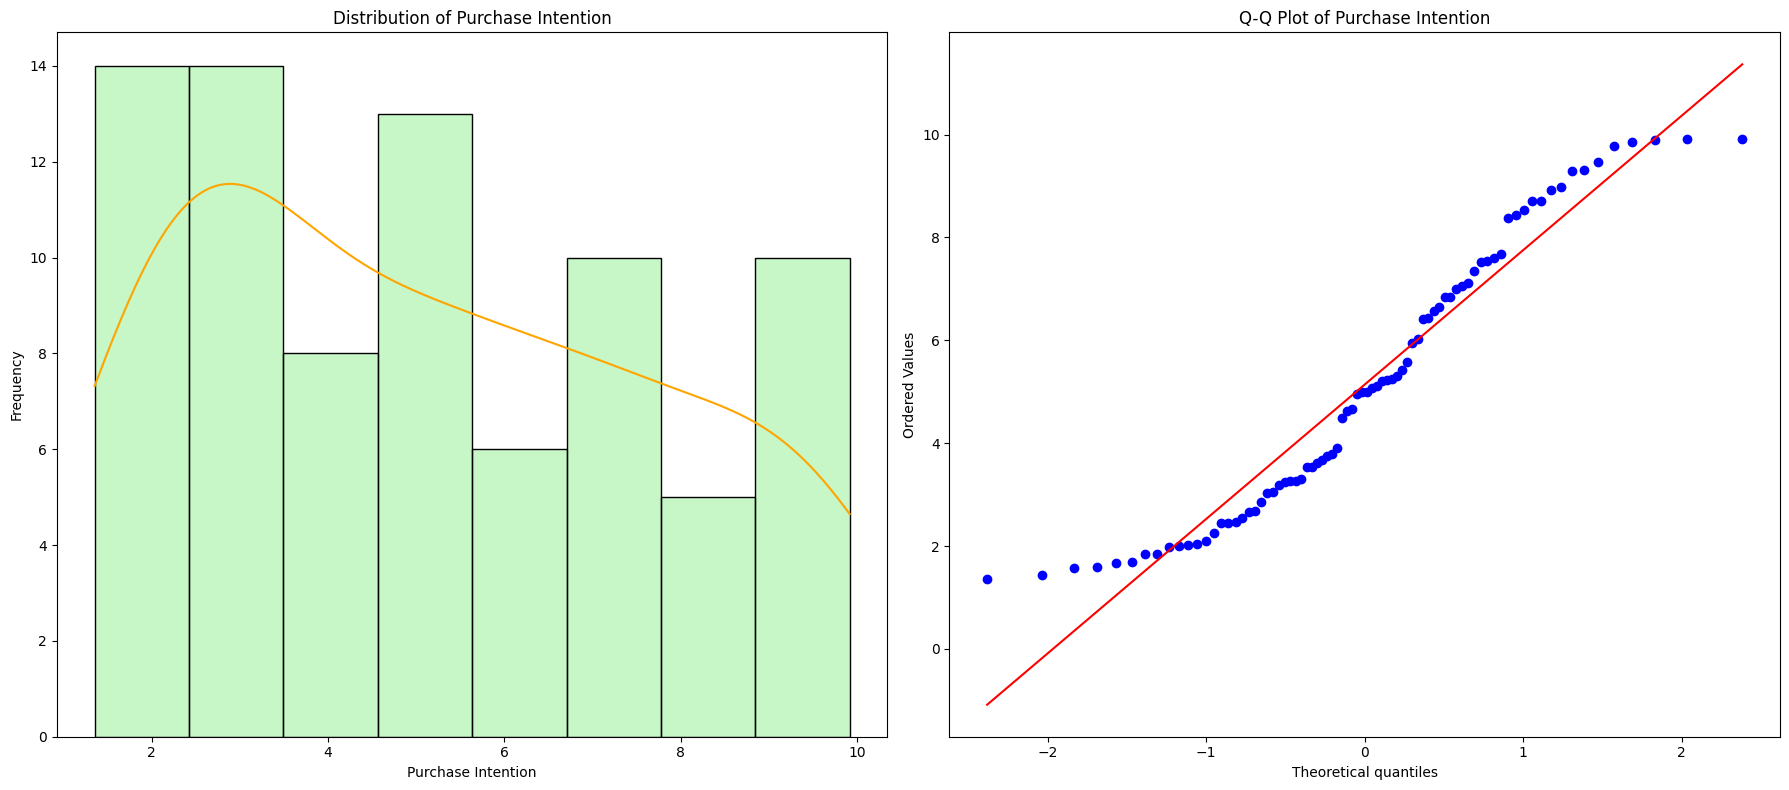

In [ ]:
# Create a figure with two subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 8))

# histogram
sns.histplot(df['purchase_intention'],color = 'lightgreen', kde = True, ax=ax1)
ax1.lines[0].set_color('orange')
ax1.set_xlabel("Purchase Intention")
ax1.set_ylabel("Frequency")
ax1.set_title("Distribution of Purchase Intention")

# qq plot

stats.probplot(df['purchase_intention'], dist="norm", plot= plt)
plt.title("Q-Q Plot of Purchase Intention")

# Adjust layout to prevent overlapping
plt.tight_layout()

# Display the plot
plt.show()

From the histogram, we can see that our data do not normally distributed. We will do statistical test for further checking.

## Statistical Tests

We are doing  Shapiro-Wilk test, Kolmogorov-Smirnov test.

In [ ]:
# Perform Shapiro-Wilk test
stat, p = shapiro(df['purchase_intention'])
print("Shapiro-Wilk test statistic:", stat)
print("p-value:", p)

# Perform Kolmogorov-Smirnov test
stat, p = kstest(df['purchase_intention'], 'norm')
print("Kolmogorov-Smirnov test statistic:", stat)
print("p-value:", p)

Shapiro-Wilk test statistic: 0.9322953820228577
p-value: 0.0003811642527580261
Kolmogorov-Smirnov test statistic: 0.9176655628936042
p-value: 3.5352401457339126e-87


Though by inspecting the qq plots the variables seems follow nornally distributed, but by inspecting histogram and doing statistical tests such as  Shapiro-Wilk test, Kolmogorov-Smirnov test, we find that our data do not follow normal distribution since our p value is smaller than significance level 0.05.

# Solution

If our data follows normal distribution, it is good but what if it does not follow normal distribution. Sometimes, we can achieve normality by applying a transformation (e.g., logarithmic, square root, box-cox).
Though box-cox transformation is not our focus, here we are giving some insights about box cox transformation.

**Box-cox** is a statistical technique used to transform non-normal data into a more normally distributed form.

It involves applying a specific mathematical formula to each data point, depending on a chosen parameter ($λ$).

Common $λ$ values and their effects:

$λ$ = -1: Reciprocal transformation (flips the data)

$λ$ = 0: Log transformation (useful for right-skewed data)

$λ$ = 0.5: Square root transformation (moderately strong)

$λ$ = 1: No transformation (original data)

$λ$ = 2: Square transformation (useful for left-skewed data)

---
**Here we did squre root transformations.**

---


In [ ]:

# Create a new column called 'tr_purchase_intention' with the squre root of the purchase intention variable.
df['tr_purchase_intention'] = np.sqrt(df['purchase_intention'])
# Print the summary statistics of data.
print(df.describe())


       purchase_intention  tr_purchase_intention
count           80.000000              80.000000
mean             5.141043               2.187974
std              2.642368               0.598576
min              1.354778               1.163949
25%              2.820296               1.679221
50%              4.997546               2.235519
75%              7.171205               2.677836
max              9.917008               3.149128


## Visual methods

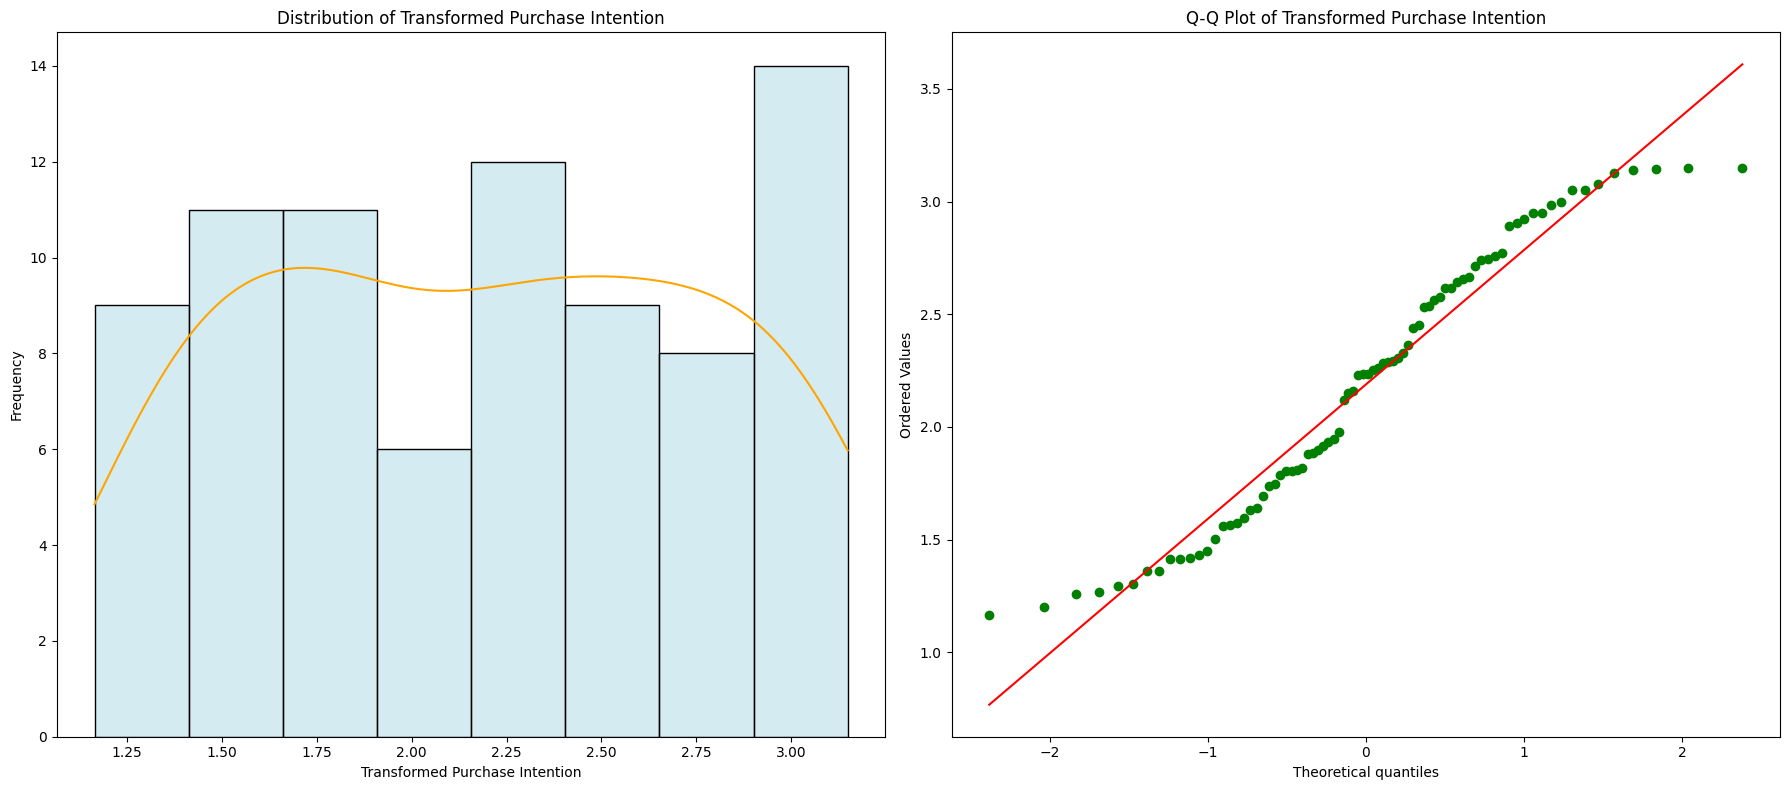

In [ ]:
# Create a figure with two subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 8))

# histograms
sns.histplot(df['tr_purchase_intention'],color = 'lightblue', kde = True, ax=ax1)
ax1.lines[0].set_color('orange')
ax1.set_xlabel("Transformed Purchase Intention")
ax1.set_ylabel("Frequency")
ax1.set_title("Distribution of Transformed Purchase Intention")

# qq plot

stats.probplot(df['tr_purchase_intention'], dist="norm", plot= plt)
plt.title("Q-Q Plot of Transformed Purchase Intention")
# Access the plot elements
lines = ax2.get_lines()
# Set the desired colors for the points and reference line
lines[0].set_color('green')  # Points
lines[1].set_color('red')   # Reference line
# Adjust layout to prevent overlapping
plt.tight_layout()

# Display the plot
plt.show()

## Statistical tests

In [ ]:
# Perform Shapiro-Wilk test
stat, p = shapiro(df['tr_purchase_intention'])
print("Shapiro-Wilk test statistic:", stat)
print("p-value:", p)

# Perform Kolmogorov-Smirnov test
stat, p = kstest(df['tr_purchase_intention'], 'norm')
print("Kolmogorov-Smirnov test statistic:", stat)
print("p-value:", p)

Shapiro-Wilk test statistic: 0.9476780295372009
p-value: 0.002544127171859145
Kolmogorov-Smirnov test statistic: 0.8777777426261371
p-value: 2.0950114091423844e-73



**Even though we rejected the Shapiro-Wilk test and Kolmogorov-Smirnov test statistics (p < 0.05), we should further look for the Q-Q plot and histogram. In the Q-Q plot, values lie around the 45-degree line, it suggests that the values are approximately normally distributed. Besides, the histogram shows the approximately normal distribution of values.**




# Comparing data before and after transformations


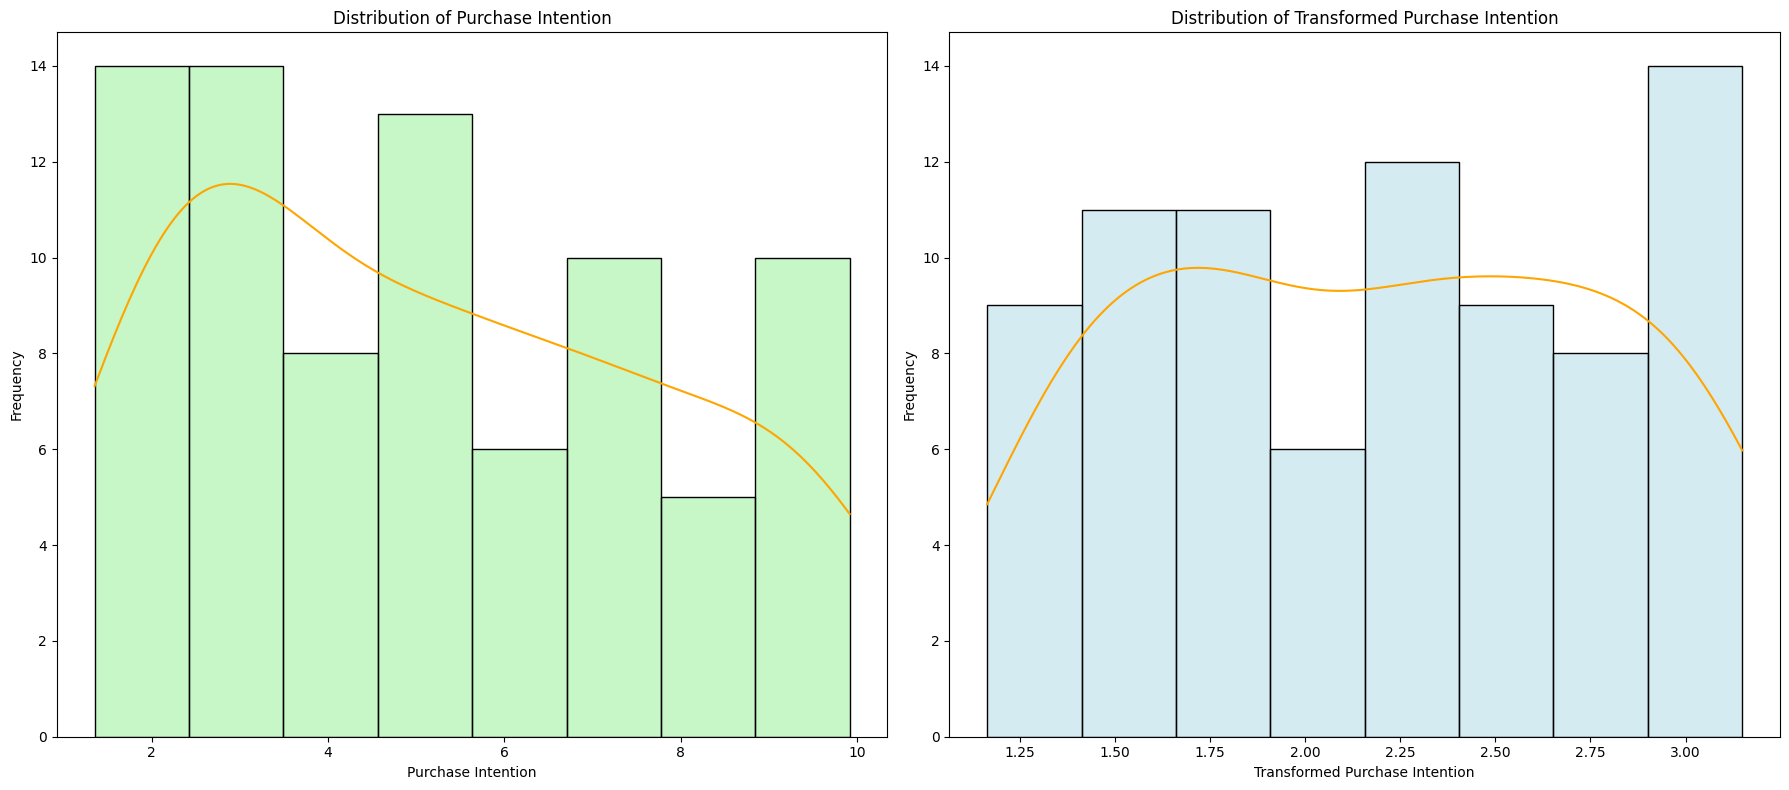

In [ ]:
# Create a figure with two subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 8))

# histogram of original column

sns.histplot(df['purchase_intention'],color = 'lightgreen', kde = True, ax=ax1)
ax1.lines[0].set_color('orange')
ax1.set_xlabel("Purchase Intention")
ax1.set_ylabel("Frequency")
ax1.set_title("Distribution of Purchase Intention")

# histogram of transformed column
sns.histplot(df['tr_purchase_intention'],color = 'lightblue', kde = True, ax=ax2)
ax2.lines[0].set_color('orange')
ax2.set_xlabel("Transformed Purchase Intention")
ax2.set_ylabel("Frequency")
ax2.set_title("Distribution of Transformed Purchase Intention")


# Adjust layout to prevent overlapping
plt.tight_layout()

# Display the plot
plt.show()

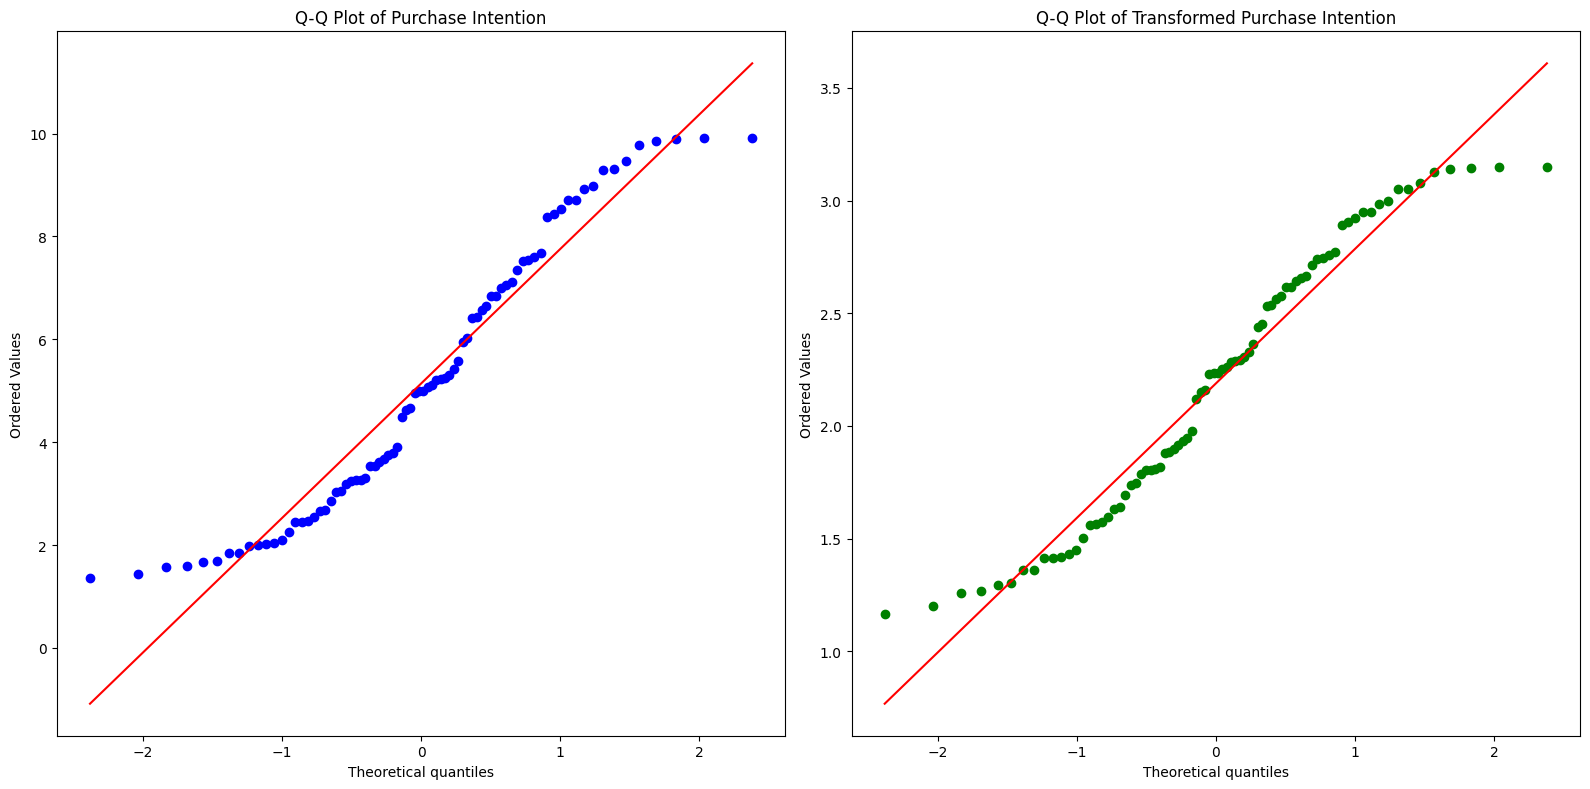

In [ ]:
# Create a figure with two subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 8))


# qq plot of original column

stats.probplot(df['purchase_intention'], dist="norm", plot= ax1)

ax1.set_title("Q-Q Plot of Purchase Intention")
# Adjust layout to prevent overlapping
plt.tight_layout()
#qq plot of transformed column

stats.probplot(df['tr_purchase_intention'], dist="norm", plot= ax2)
ax2.set_title("Q-Q Plot of Transformed Purchase Intention")

# Access the plot elements
lines = ax2.get_lines()
# Set the desired colors for the points and reference line
lines[0].set_color('green')  # Points
lines[1].set_color('red')   # Reference line

# Adjust layout to prevent overlapping
plt.tight_layout()

# Display the plot
plt.show()

Though we can't differentiate in Q-Q plots we can see there is a significant change in histograms. The histogram of transformed data looks more normally distributed.


**This is how we test for normality and take steps to make the data follow normal distribution if it comes from non normal distributions.**
